## Miles Kim Parr
#### 604643523
#### Group Assignment 2
#### Group Members: Annie Chan, Max Garcia, Aydin Pasebani, Rodrigo Gutierrez

Lets do it

As a group, we are dividing up Los Angeles County into Supervisorial Districts 1-5, and measuring household income data against availability of parks.

I am working on Supervisorial District 2, which encompasses most of South-East LA. I will add a picture below for context (Its the Pink One!):


![](https://redistricting.lacounty.gov/wp-content/uploads/2021/12/Final_Map_small.png)


In [1]:
#Lets add our libraries. The classic opener.
import pandas as pd 
import geopandas as gpd

## Income Census Data Import
I cleaned most of my data on Excel, kinda following the guide that Chris sent out. I know that it can be done here and I will try it next time.

In [2]:
Income = pd.read_excel('Data/Income-Data.xlsx')

In [3]:
Income.head(5)
# Leading 0 is missing for Geo_ID. Gonna have to fix that. Otherwise looks good.

,Geometry,GEO_ID,Less_10k,10k_to_14999,15k_to_19999,20k_24999,25k_to_29999,30k_34999,35k_39999,40k_to_44999,45k_to_49999,50k_to_59999,60k_to_74999,75k_to_99999,100k_to_124999,125k_to_149999,150k_to_299999,200k_plus
0,0500000U,6037,180980,142812,112340,121032,119357,122002,115562,116264,102875,216948,296740,414844,325230,237643,299389,418793
1,1400000U,6037101110,54,126,49,33,61,6,60,85,43,149,105,146,210,134,143,90
2,1400000U,6037101122,88,0,7,42,50,36,0,13,0,37,200,158,126,194,168,253
3,1400000U,6037101220,78,82,28,102,7,86,43,55,36,189,89,134,116,60,140,112
4,1400000U,6037101221,76,107,118,148,0,81,111,27,97,112,32,193,207,33,108,0


In [4]:
Income = pd.read_excel(
    'Data/Income-Data.xlsx',
    dtype=
    {
        'GEO_ID':str,
    }
)

In [5]:
Income.head(5)
# Fixed it! Took many tries but we got there. Go team.

,Geometry,GEO_ID,Less_10k,10k_to_14999,15k_to_19999,20k_24999,25k_to_29999,30k_34999,35k_39999,40k_to_44999,45k_to_49999,50k_to_59999,60k_to_74999,75k_to_99999,100k_to_124999,125k_to_149999,150k_to_299999,200k_plus
0,0500000U,06037,180980,142812,112340,121032,119357,122002,115562,116264,102875,216948,296740,414844,325230,237643,299389,418793
1,1400000U,06037101110,54,126,49,33,61,6,60,85,43,149,105,146,210,134,143,90
2,1400000U,06037101122,88,0,7,42,50,36,0,13,0,37,200,158,126,194,168,253
3,1400000U,06037101220,78,82,28,102,7,86,43,55,36,189,89,134,116,60,140,112
4,1400000U,06037101221,76,107,118,148,0,81,111,27,97,112,32,193,207,33,108,0


In [6]:
Income.info(verbose=True, show_counts=True)
# Lets see some more data and check if anything is missing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Geometry        2499 non-null   object
 1   GEO_ID          2499 non-null   object
 2   Less_10k        2499 non-null   int64 
 3   10k_to_14999    2499 non-null   int64 
 4   15k_to_19999    2499 non-null   int64 
 5   20k_24999       2499 non-null   int64 
 6   25k_to_29999    2499 non-null   int64 
 7   30k_34999       2499 non-null   int64 
 8   35k_39999       2499 non-null   int64 
 9   40k_to_44999    2499 non-null   int64 
 10  45k_to_49999    2499 non-null   int64 
 11  50k_to_59999    2499 non-null   int64 
 12  60k_to_74999    2499 non-null   int64 
 13  75k_to_99999    2499 non-null   int64 
 14  100k_to_124999  2499 non-null   int64 
 15  125k_to_149999  2499 non-null   int64 
 16  150k_to_299999  2499 non-null   int64 
 17  200k_plus       2499 non-null   int64 
dtypes: int64

In [7]:
Income.columns[Income.isna().all()].tolist()

[]

#### Census Data for LA county is in! 
Step 1 complete. Also, there are no null columns to drop. Let's make some graphs and charts.

<Axes: xlabel='Less_10k', ylabel='10k_to_14999'>

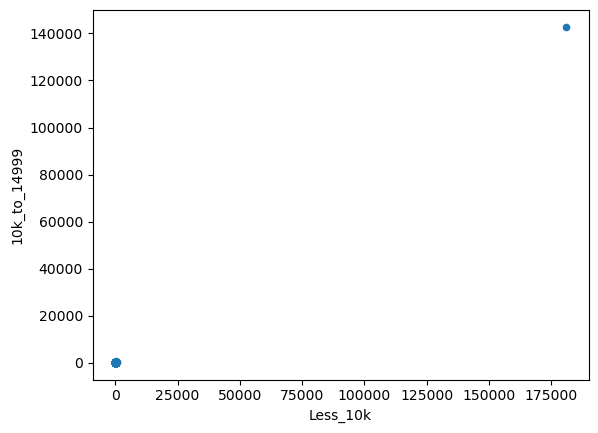

In [8]:
Income.plot.scatter(x='Less_10k',y='10k_to_14999')

In [9]:
# Wow really terrible graph. I'm not 100% sure what I wanted to graph but its not this. Somethings off. 
# Lets get rid of the county wide stat line. Its chonky.

In [10]:
Income = Income.drop([0])
Income

,Geometry,GEO_ID,Less_10k,10k_to_14999,15k_to_19999,20k_24999,25k_to_29999,30k_34999,35k_39999,40k_to_44999,45k_to_49999,50k_to_59999,60k_to_74999,75k_to_99999,100k_to_124999,125k_to_149999,150k_to_299999,200k_plus
1,1400000U,06037101110,54,126,49,33,61,6,60,85,43,149,105,146,210,134,143,90
2,1400000U,06037101122,88,0,7,42,50,36,0,13,0,37,200,158,126,194,168,253
3,1400000U,06037101220,78,82,28,102,7,86,43,55,36,189,89,134,116,60,140,112
4,1400000U,06037101221,76,107,118,148,0,81,111,27,97,112,32,193,207,33,108,0
5,1400000U,06037101222,161,167,34,41,19,116,0,86,14,35,44,96,9,81,0,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,1400000U,06037980038,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2495,1400000U,06037980039,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2496,1400000U,06037990100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2497,1400000U,06037990200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<Axes: xlabel='Less_10k', ylabel='10k_to_14999'>

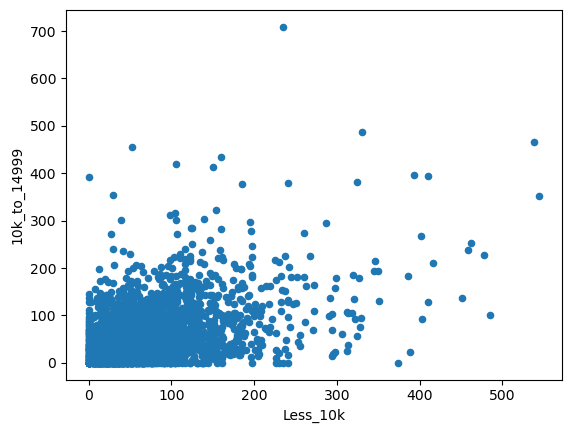

In [11]:
Income.plot.scatter(x='Less_10k',y='10k_to_14999')

### Wow data. 
Honestly, I can't really see a correlation between these two variables, I thought they might be similar becuase of how close the income levels are but there no clear line. Maybe the less than 10k is a lot different because the bucket is bigger or hard to define.

<Axes: xlabel='15k_to_19999', ylabel='10k_to_14999'>

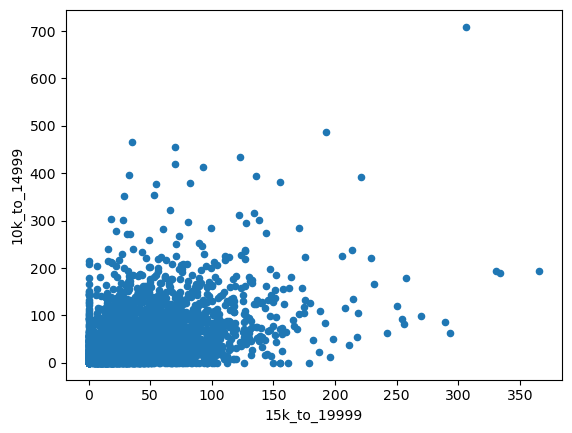

In [12]:
Income.plot.scatter(x='15k_to_19999',y='10k_to_14999')

Still not much correlation :( . Scatter Plots are probably not the best move for this data. I want to see a Histogram instead.

In [13]:
# Before that, lets try to add a column for total households. I think it'll make it easier later on to do some calculations like percentages
Income['Total'] =  Income['Less_10k'] + Income['10k_to_14999'] + Income['15k_to_19999'] + Income['20k_24999'] + Income['25k_to_29999'] + Income['30k_34999'] + Income['35k_39999'] + Income['40k_to_44999'] + Income['45k_to_49999'] + Income['50k_to_59999'] + Income['60k_to_74999'] + Income['75k_to_99999'] + Income['100k_to_124999'] + Income['125k_to_149999'] + Income['150k_to_299999'] + Income['200k_plus']
Income['Total']

1       1494
2       1372
3       1357
4       1450
5        935
        ... 
2494       0
2495       0
2496       0
2497       0
2498       0
Name: Total, Length: 2498, dtype: int64

In [14]:
Income.head()
# Cool that worked. Looks like theres a couple places where Total = 0, places where no one lives

,Geometry,GEO_ID,Less_10k,10k_to_14999,15k_to_19999,20k_24999,25k_to_29999,30k_34999,35k_39999,40k_to_44999,45k_to_49999,50k_to_59999,60k_to_74999,75k_to_99999,100k_to_124999,125k_to_149999,150k_to_299999,200k_plus,Total
1,1400000U,06037101110,54,126,49,33,61,6,60,85,43,149,105,146,210,134,143,90,1494
2,1400000U,06037101122,88,0,7,42,50,36,0,13,0,37,200,158,126,194,168,253,1372
3,1400000U,06037101220,78,82,28,102,7,86,43,55,36,189,89,134,116,60,140,112,1357
4,1400000U,06037101221,76,107,118,148,0,81,111,27,97,112,32,193,207,33,108,0,1450
5,1400000U,06037101222,161,167,34,41,19,116,0,86,14,35,44,96,9,81,0,32,935


In [15]:
Income.tail()

,Geometry,GEO_ID,Less_10k,10k_to_14999,15k_to_19999,20k_24999,25k_to_29999,30k_34999,35k_39999,40k_to_44999,45k_to_49999,50k_to_59999,60k_to_74999,75k_to_99999,100k_to_124999,125k_to_149999,150k_to_299999,200k_plus,Total
2494,1400000U,06037980038,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2495,1400000U,06037980039,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2496,1400000U,06037990100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2497,1400000U,06037990200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2498,1400000U,06037990300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<Axes: ylabel='Frequency'>

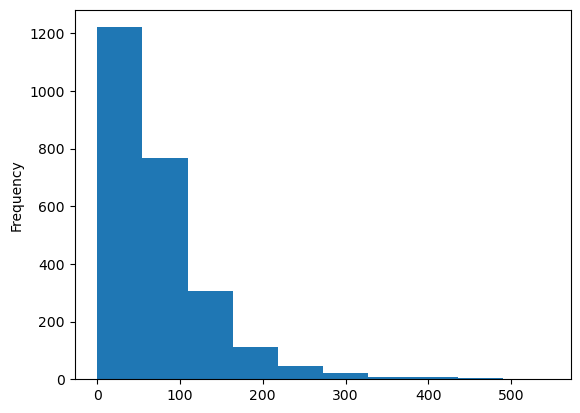

In [16]:
Income['Less_10k'].plot.hist()

<Axes: ylabel='Frequency'>

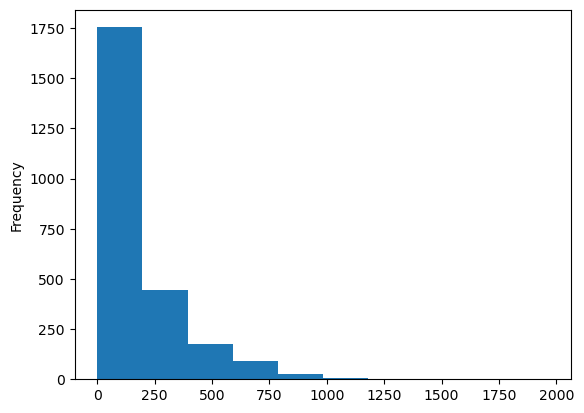

In [17]:
Income['200k_plus'].plot.hist()

Interesting to look at both of these. There are a lot of plots where the income is 200k plus across LA, especially compared to how many are less than 10k. This was fun to play around with but lets keep it pushing.

In [18]:
Biggest = Income.sort_values(by='Total',ascending = False)

In [19]:
Biggest[['GEO_ID','Total']].head(10)

,GEO_ID,Total
2279,06037702900,5202
1029,06037275604,4597
2240,06037700200,4319
2241,06037700300,3965
607,06037207902,3928
2267,06037702102,3739
2047,06037577300,3730
2256,06037701402,3712
2026,06037576001,3506
2238,06037700101,3484


# Merging the Income Dataset with a Map

In [20]:
# Lets get the Census tracts in and matching with the dataset
Tracts = gpd.read_file('Data/tl_2021_06_tract.zip')

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


In [21]:
type(Tracts)

geopandas.geodataframe.GeoDataFrame

In [22]:
Tracts.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,06,085,504321,06085504321,5043.21,Census Tract 5043.21,G5020,S,1450237,0,+37.3931319,-121.8651427,"POLYGON ((-121.87556 37.39924, -121.87535 37.3..."
1,06,085,504410,06085504410,5044.10,Census Tract 5044.10,G5020,S,1102136,0,+37.4093719,-121.8788884,"POLYGON ((-121.88886 37.40758, -121.88576 37.4..."
2,06,085,507003,06085507003,5070.03,Census Tract 5070.03,G5020,S,9529865,0,+37.2199936,-121.9979512,"POLYGON ((-122.02489 37.21683, -122.02459 37.2..."
3,06,085,507004,06085507004,5070.04,Census Tract 5070.04,G5020,S,2424447,0,+37.2260144,-121.9763816,"POLYGON ((-121.99304 37.22562, -121.99249 37.2..."
4,06,085,502204,06085502204,5022.04,Census Tract 5022.04,G5020,S,331145,0,+37.3013832,-121.9258424,"POLYGON ((-121.93167 37.29803, -121.92801 37.3..."


<Axes: >

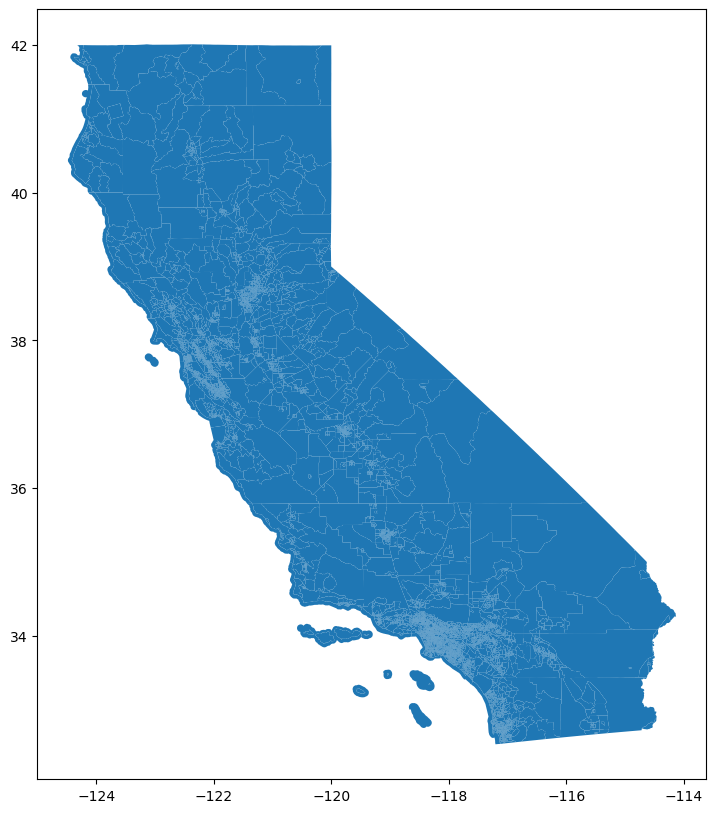

In [23]:
Tracts.plot(figsize=(12,10))

Wow that was a bigger dataset than I thought. Its ok its ok.

In [24]:
Tracts.info(verbose=True, show_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 9129 entries, 0 to 9128
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   STATEFP   9129 non-null   object  
 1   COUNTYFP  9129 non-null   object  
 2   TRACTCE   9129 non-null   object  
 3   GEOID     9129 non-null   object  
 4   NAME      9129 non-null   object  
 5   NAMELSAD  9129 non-null   object  
 6   MTFCC     9129 non-null   object  
 7   FUNCSTAT  9129 non-null   object  
 8   ALAND     9129 non-null   int64   
 9   AWATER    9129 non-null   int64   
 10  INTPTLAT  9129 non-null   object  
 11  INTPTLON  9129 non-null   object  
 12  geometry  9129 non-null   geometry
dtypes: geometry(1), int64(2), object(10)
memory usage: 927.3+ KB


In [25]:
# 13 Columns is too many. I only need the GeoID and the geometry. I think GEOID is already in the format that I need to match it up.
Tracts1 = Tracts[['GEOID','geometry']]
Tracts1.head()

,GEOID,geometry
0,06085504321,"POLYGON ((-121.87556 37.39924, -121.87535 37.3..."
1,06085504410,"POLYGON ((-121.88886 37.40758, -121.88576 37.4..."
2,06085507003,"POLYGON ((-122.02489 37.21683, -122.02459 37.2..."
3,06085507004,"POLYGON ((-121.99304 37.22562, -121.99249 37.2..."
4,06085502204,"POLYGON ((-121.93167 37.29803, -121.92801 37.3..."


In [26]:
# Rename GEOID to GEO_ID so we can match the datasets 
Tracts1.columns = ['GEO_ID',
'geometry']
Tracts1

,GEO_ID,geometry
0,06085504321,"POLYGON ((-121.87556 37.39924, -121.87535 37.3..."
1,06085504410,"POLYGON ((-121.88886 37.40758, -121.88576 37.4..."
2,06085507003,"POLYGON ((-122.02489 37.21683, -122.02459 37.2..."
3,06085507004,"POLYGON ((-121.99304 37.22562, -121.99249 37.2..."
4,06085502204,"POLYGON ((-121.93167 37.29803, -121.92801 37.3..."
...,...,...
9124,06059001303,"POLYGON ((-117.95917 33.92458, -117.95888 33.9..."
9125,06059001304,"POLYGON ((-117.95918 33.92820, -117.95831 33.9..."
9126,06059001401,"POLYGON ((-117.95056 33.94503, -117.95055 33.9..."
9127,06013367200,"POLYGON ((-122.34551 37.96355, -122.34550 37.9..."


In [27]:
# MERGE
Tracts_Income=Tracts1.merge(Income,on="GEO_ID")
Tracts_Income

,GEO_ID,geometry,Geometry,Less_10k,10k_to_14999,15k_to_19999,20k_24999,25k_to_29999,30k_34999,35k_39999,40k_to_44999,45k_to_49999,50k_to_59999,60k_to_74999,75k_to_99999,100k_to_124999,125k_to_149999,150k_to_299999,200k_plus,Total
0,06037137000,"POLYGON ((-118.65862 34.17142, -118.65849 34.1...",1400000U,10,19,87,49,14,37,58,100,5,46,172,295,84,79,149,514,1718
1,06037541605,"POLYGON ((-118.21630 33.90339, -118.21538 33.9...",1400000U,120,97,8,136,24,64,101,91,32,251,92,186,153,98,11,27,1491
2,06037541801,"POLYGON ((-118.19998 33.90668, -118.19878 33.9...",1400000U,56,23,0,20,20,50,80,78,82,197,118,168,135,53,53,6,1139
3,06037541802,"POLYGON ((-118.19359 33.90654, -118.19343 33.9...",1400000U,88,20,0,22,48,19,72,67,57,135,168,138,146,140,42,69,1231
4,06037542000,"POLYGON ((-118.20734 33.90732, -118.20733 33.9...",1400000U,9,23,52,0,60,33,13,55,72,119,146,289,32,99,120,33,1155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2493,06037480902,"POLYGON ((-118.14496 34.08080, -118.14479 34.0...",1400000U,74,82,256,86,17,91,35,12,9,63,135,223,156,77,67,28,1411
2494,06037189600,"POLYGON ((-118.33698 34.10837, -118.33694 34.1...",1400000U,101,14,17,21,135,52,47,73,44,148,345,321,143,68,135,324,1988
2495,06037189400,"POLYGON ((-118.32676 34.11112, -118.32674 34.1...",1400000U,21,142,0,0,0,48,9,11,16,36,68,100,173,174,212,538,1548
2496,06037181400,"POLYGON ((-118.21897 34.14000, -118.21734 34.1...",1400000U,92,8,45,90,19,29,50,13,41,176,82,313,196,192,191,126,1663


## IT WORKED

#### Analyze the Data

<Axes: >

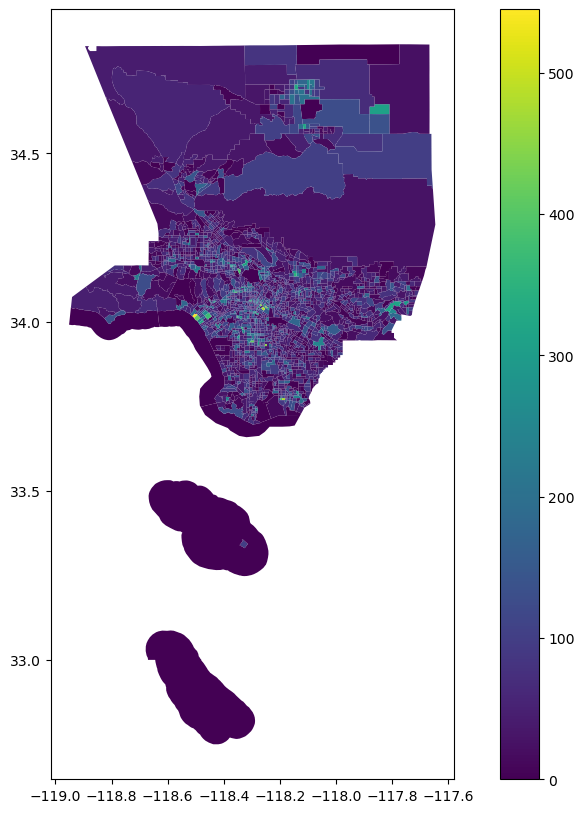

In [28]:
Tracts_Income.plot(figsize=(12,10),
                 column='Less_10k',
                 legend=True, 
                 )

Cool. Now I need to further divide into the Supervisorial District 2.

### Second Merge

In [29]:
# add the data, which I filtered already
District = pd.read_excel('Data/District2.xlsx',
    dtype =
    {
        'CT20':str,
    }
)
District

,OBJECTID_12,Join_Count,TARGET_FID,CT20,LABEL,NAME,SUP_NAME,DIST_SUP,CITYNAME_ALF,NAME_1,JURISDICTION,AREA_NUM,AREA_NAME,Shape__Area,Shape__Length
0,1053,2,1053,292001,2920.01,2ND SUP. DISTRICT,2ND DISTRICT: HOLLY MITCHELL,2,LOS ANGELES,WEST CARSON,INCORPORATED/UNINCORPORATED,11,South Bay Planning Area,5.131255e+06,10804.595375
1,1690,2,1690,532700,5327.00,2ND SUP. DISTRICT,2ND DISTRICT: HOLLY MITCHELL,2,NaN,FLORENCE - FIRESTONE,UNINCORPORATED AREA,9,Metro Planning Area,8.490875e+05,4534.761042
2,1691,1,1691,532800,5328.00,2ND SUP. DISTRICT,2ND DISTRICT: HOLLY MITCHELL,2,NaN,FLORENCE - FIRESTONE,UNINCORPORATED AREA,9,Metro Planning Area,8.035079e+05,3694.545353
3,1692,1,1692,532900,5329.00,2ND SUP. DISTRICT,2ND DISTRICT: HOLLY MITCHELL,2,NaN,FLORENCE - FIRESTONE,UNINCORPORATED AREA,9,Metro Planning Area,1.118500e+06,4390.998811
4,1693,1,1693,533001,5330.01,2ND SUP. DISTRICT,2ND DISTRICT: HOLLY MITCHELL,2,NaN,FLORENCE - FIRESTONE,UNINCORPORATED AREA,9,Metro Planning Area,6.964311e+05,4069.850495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,2279,2,2279,702900,7029.00,2ND SUP. DISTRICT,2ND DISTRICT: HOLLY MITCHELL,2,NaN,MARINA DEL REY,UNINCORPORATED AREA,5,Westside Planning Area,5.475846e+06,9552.767414
62,2280,1,2280,703002,7030.02,2ND SUP. DISTRICT,2ND DISTRICT: HOLLY MITCHELL,2,NaN,LADERA HEIGHTS / VIEWPARK - WINDSOR HILLS,UNINCORPORATED AREA,5,Westside Planning Area,4.778156e+06,10255.302009
63,2282,1,2282,703100,7031.00,2ND SUP. DISTRICT,2ND DISTRICT: HOLLY MITCHELL,2,NaN,LADERA HEIGHTS / VIEWPARK - WINDSOR HILLS,UNINCORPORATED AREA,5,Westside Planning Area,3.885455e+06,9860.745898
64,2283,1,2283,703200,7032.00,2ND SUP. DISTRICT,2ND DISTRICT: HOLLY MITCHELL,2,NaN,LADERA HEIGHTS / VIEWPARK - WINDSOR HILLS,UNINCORPORATED AREA,5,Westside Planning Area,3.072463e+06,8404.136284


In [30]:
District2 = District[['CT20','NAME_1','JURISDICTION']]
District2.head()
# Make the dataset smaller

,CT20,NAME_1,JURISDICTION
0,292001,WEST CARSON,INCORPORATED/UNINCORPORATED
1,532700,FLORENCE - FIRESTONE,UNINCORPORATED AREA
2,532800,FLORENCE - FIRESTONE,UNINCORPORATED AREA
3,532900,FLORENCE - FIRESTONE,UNINCORPORATED AREA
4,533001,FLORENCE - FIRESTONE,UNINCORPORATED AREA


In [31]:
District2.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CT20          66 non-null     object
 1   NAME_1        66 non-null     object
 2   JURISDICTION  66 non-null     object
dtypes: object(3)
memory usage: 1.7+ KB


In [32]:
District2['GEO_ID'] = '06' + '037' + District2['CT20']
District2.head()
# Make a GEO_ID column to match the other dataset so they can merge
# This warning realllllly messed with me for a long time. I thought it was an error and I kept redoing it. 

/tmp/ipykernel_96/1367946998.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  District2['GEO_ID'] = '06' + '037' + District2['CT20']


,CT20,NAME_1,JURISDICTION,GEO_ID
0,292001,WEST CARSON,INCORPORATED/UNINCORPORATED,06037292001
1,532700,FLORENCE - FIRESTONE,UNINCORPORATED AREA,06037532700
2,532800,FLORENCE - FIRESTONE,UNINCORPORATED AREA,06037532800
3,532900,FLORENCE - FIRESTONE,UNINCORPORATED AREA,06037532900
4,533001,FLORENCE - FIRESTONE,UNINCORPORATED AREA,06037533001


THIRD MERGE

In [33]:
District2Income=Tracts_Income.merge(District2,on="GEO_ID")
# I could've skipped the whole second merge but hindsight is 2020

<Axes: >

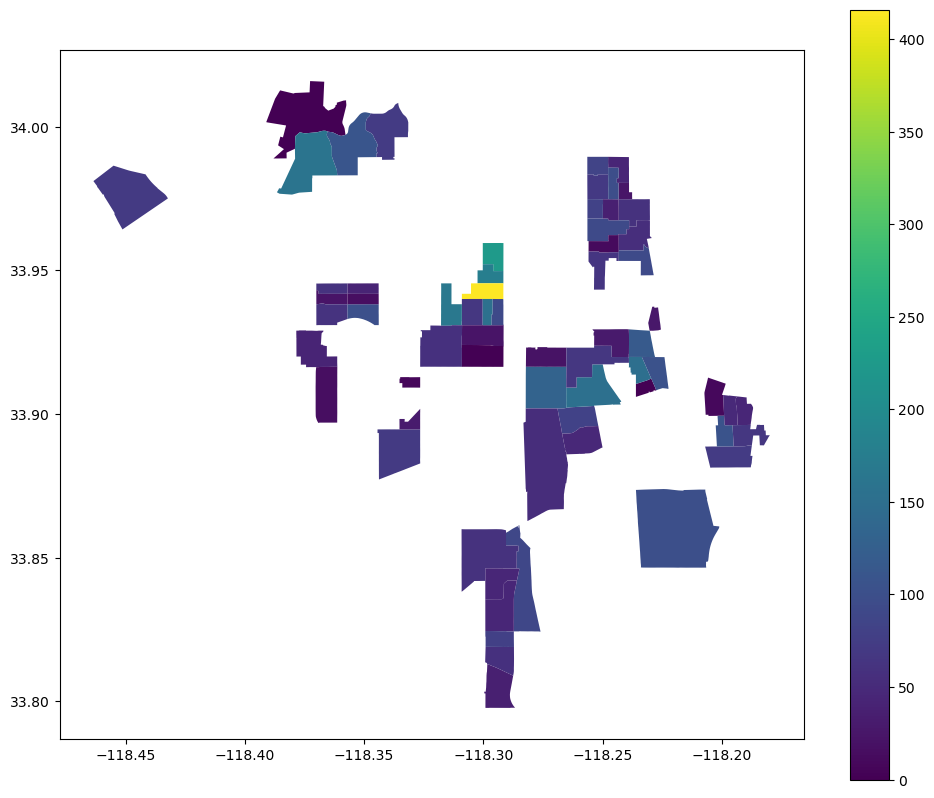

In [34]:
District2Income.plot(figsize=(12,10),
                 column='Less_10k',
                 legend=True, )
# Plot out District 2 for the first time

In [35]:
District2Income.sample(10)

,GEO_ID,geometry,Geometry,Less_10k,10k_to_14999,15k_to_19999,20k_24999,25k_to_29999,30k_34999,35k_39999,...,60k_to_74999,75k_to_99999,100k_to_124999,125k_to_149999,150k_to_299999,200k_plus,Total,CT20,NAME_1,JURISDICTION
18,06037541100,"POLYGON ((-118.26896 33.90196, -118.26846 33.9...",1400000U,82,57,75,14,33,20,18,...,60,143,69,89,30,77,886,541100,W RANCHO DOMINGUEZ - VICTORIA,UNINCORPORATED AREA
37,06037603706,"POLYGON ((-118.33518 33.89787, -118.33518 33.8...",1400000U,30,57,62,48,35,0,183,...,171,94,20,0,38,0,1048,603706,ALONDRA PARK,UNINCORPORATED AREA
2,06037600100,"POLYGON ((-118.30027 33.95948, -118.30004 33.9...",1400000U,225,217,111,179,134,84,130,...,171,223,56,103,106,18,2217,600100,W ATHENS - WESTMONT,UNINCORPORATED AREA
41,06037532800,"POLYGON ((-118.25644 33.98431, -118.25644 33.9...",1400000U,83,19,0,64,122,68,64,...,94,122,61,0,34,9,929,532800,FLORENCE - FIRESTONE,UNINCORPORATED AREA
39,06037543305,"POLYGON ((-118.23605 33.87360, -118.23583 33.8...",1400000U,100,0,41,36,33,29,0,...,184,307,97,141,111,29,1243,543305,RANCHO DOMINGUEZ,UNINCORPORATED AREA
60,06037600303,"POLYGON ((-118.30030 33.93283, -118.30029 33.9...",1400000U,154,110,22,115,166,28,58,...,87,130,59,16,49,63,1279,600303,W ATHENS - WESTMONT,UNINCORPORATED AREA
7,06037534900,"POLYGON ((-118.24332 33.97474, -118.24329 33.9...",1400000U,60,11,71,18,51,39,98,...,174,280,77,156,21,28,1323,534900,FLORENCE - FIRESTONE,UNINCORPORATED AREA
53,06037542106,"POLYGON ((-118.19558 33.89614, -118.19450 33.8...",1400000U,65,17,53,60,34,21,44,...,20,103,25,12,37,0,756,542106,EAST RANCHO DOMINGUEZ,INCORPORATED/UNINCORPORATED
24,06037542104,"POLYGON ((-118.19420 33.90498, -118.19420 33.9...",1400000U,45,32,18,39,24,43,32,...,93,125,53,73,55,108,871,542104,EAST RANCHO DOMINGUEZ,UNINCORPORATED AREA
22,06037543501,"POLYGON ((-118.29052 33.85870, -118.28971 33.8...",1400000U,88,132,0,0,0,47,45,...,156,257,295,233,108,112,1875,543501,WEST CARSON,INCORPORATED/UNINCORPORATED


## Add Parks

In [36]:
Parks = gpd.read_file('Data/Parks.zip')
Parks

,address,name,objectid,geometry
0,3400 Wilshire blvd,Robert F Kennedy Inspiration Park,1.0,"POLYGON ((-118.29796 34.06162, -118.29697 34.0..."
1,4702 N. Figueroa St,SYCAMORE GROVE PARK,2.0,"MULTIPOLYGON (((-118.20110 34.10134, -118.2011..."
2,351 N. Gaffey St.,San Pedro Welcome Park,3.0,"POLYGON ((-118.29286 33.74600, -118.29286 33.7..."
3,1015 S.Wilton PL,WILTON PLACE PARK,4.0,"POLYGON ((-118.31504 34.05232, -118.31497 34.0..."
4,1780 E.Santa Ana Blvd,WATTS CULTURAL CRESCENT,5.0,"POLYGON ((-118.24221 33.93945, -118.24225 33.9..."
...,...,...,...,...
505,"4501 S. CENTRAL AVE, LA, CA 90011",VERNON BRANCH LIBRARY POCKET PARK,508.0,"POLYGON ((-118.25661 34.00268, -118.25661 34.0..."
506,"4948-4956 YORK BLVD,LA,CA 90042",YORK BLVD POCKET PARK,509.0,"POLYGON ((-118.20707 34.12131, -118.20714 34.1..."
507,1010 W. 25th St,HOOVER RECREATION CENTER,510.0,"MULTIPOLYGON (((-118.28359 34.03293, -118.2835..."
508,5340 Canoga Avenue,OLD FIRE STATION 84 POCKET PARK,511.0,"POLYGON ((-118.59692 34.16705, -118.59697 34.1..."


<Axes: >

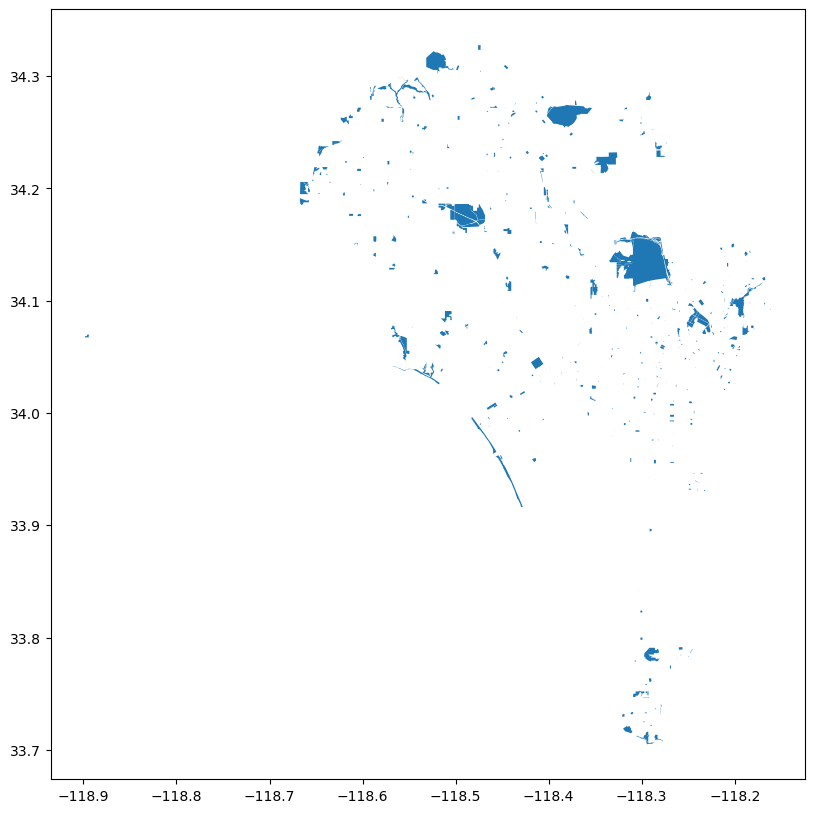

In [37]:
Parks.plot(figsize=(12,10))

Lets try one more thing

In [38]:
NoCar = pd.read_excel('Data/VehicleOwnership.xlsx',
 dtype =
    {
        'geoid20':str,
    }
)
NoCar.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29936 entries, 0 to 29935
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   geoid20                 29936 non-null  object 
 1   denom_occupied_housing  29749 non-null  float64
 2   no_vehicle_count        29749 non-null  float64
 3   no_vehicle_pct          29695 non-null  float64
dtypes: float64(3), object(1)
memory usage: 935.6+ KB


In [39]:
NoCar['GEO_ID'] = '0' + NoCar['geoid20']
NoCar.head()
# Rinse and repeat. Make everydata set have GEO_ID in the right format and merge them all

,geoid20,denom_occupied_housing,no_vehicle_count,no_vehicle_pct,GEO_ID
0,6037101110,1494.0,192.0,12.851406,06037101110
1,6037101122,1372.0,9.0,0.655977,06037101122
2,6037101220,1357.0,73.0,5.379514,06037101220
3,6037101221,1450.0,215.0,14.827586,06037101221
4,6037101222,935.0,196.0,20.962566,06037101222


## Merge again! Frankenstein super dataset.

In [40]:
Frankie=District2Income.merge(NoCar,on="GEO_ID")
# The final piece 
Frankie

,GEO_ID,geometry,Geometry,Less_10k,10k_to_14999,15k_to_19999,20k_24999,25k_to_29999,30k_34999,35k_39999,...,150k_to_299999,200k_plus,Total,CT20,NAME_1,JURISDICTION,geoid20,denom_occupied_housing,no_vehicle_count,no_vehicle_pct
0,06037542000,"POLYGON ((-118.20734 33.90732, -118.20733 33.9...",1400000U,9,23,52,0,60,33,13,...,120,33,1155,542000,EAST RANCHO DOMINGUEZ,INCORPORATED/UNINCORPORATED,6037542000,1155.0,62.0,5.367965
1,06037542000,"POLYGON ((-118.20734 33.90732, -118.20733 33.9...",1400000U,9,23,52,0,60,33,13,...,120,33,1155,542000,EAST RANCHO DOMINGUEZ,INCORPORATED/UNINCORPORATED,6037542000,1087.0,94.0,8.647654
2,06037542000,"POLYGON ((-118.20734 33.90732, -118.20733 33.9...",1400000U,9,23,52,0,60,33,13,...,120,33,1155,542000,EAST RANCHO DOMINGUEZ,INCORPORATED/UNINCORPORATED,6037542000,1135.0,129.0,11.365639
3,06037542000,"POLYGON ((-118.20734 33.90732, -118.20733 33.9...",1400000U,9,23,52,0,60,33,13,...,120,33,1155,542000,EAST RANCHO DOMINGUEZ,INCORPORATED/UNINCORPORATED,6037542000,1135.0,98.0,8.634361
4,06037542000,"POLYGON ((-118.20734 33.90732, -118.20733 33.9...",1400000U,9,23,52,0,60,33,13,...,120,33,1155,542000,EAST RANCHO DOMINGUEZ,INCORPORATED/UNINCORPORATED,6037542000,1135.0,63.0,5.550661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,06037702900,"POLYGON ((-118.46337 33.98112, -118.46279 33.9...",1400000U,71,0,126,64,35,299,244,...,570,1715,5202,702900,MARINA DEL REY,UNINCORPORATED AREA,6037702900,5417.0,186.0,3.433635
788,06037702900,"POLYGON ((-118.46337 33.98112, -118.46279 33.9...",1400000U,71,0,126,64,35,299,244,...,570,1715,5202,702900,MARINA DEL REY,UNINCORPORATED AREA,6037702900,5410.0,220.0,4.066544
789,06037702900,"POLYGON ((-118.46337 33.98112, -118.46279 33.9...",1400000U,71,0,126,64,35,299,244,...,570,1715,5202,702900,MARINA DEL REY,UNINCORPORATED AREA,6037702900,5503.0,269.0,4.888243
790,06037702900,"POLYGON ((-118.46337 33.98112, -118.46279 33.9...",1400000U,71,0,126,64,35,299,244,...,570,1715,5202,702900,MARINA DEL REY,UNINCORPORATED AREA,6037702900,5669.0,319.0,5.627095


## Maybe for next week
I want to put my dataset overlayed with the parks data while displaying a bunch of different things like Income Levels, transportion needs etc. . I realize this will probably not fit on one map with my current skills but maybe we'll learn something new and it will. 

# Folium

In [41]:
import folium

In [42]:
m = folium.Map(location=[33.891993, -118.311256], # Centered over my area of the map
               zoom_start = 11, # Slightly adjusted here to see whole area
               tiles='CartoDB positron', # Honestly I don't know the other options, maybe another time
               attribution='CartoDB')

# Working mostly off the lecture here fully honest but I did do this a buncha times to get something better
folium.Choropleth(
                  geo_data=Frankie, 
                  data=Frankie,          
                  key_on='feature.properties.GEO_ID', 
                  columns=['GEO_ID', 'no_vehicle_pct'], 
                  fill_color='YlGnBu',
                  line_weight=0.1, 
                  fill_opacity=0.8,
                  line_opacity=0.2,
                  legend_name='No Vehicle Household by Percent').add_to(m)
m

In [43]:
m.save('District2LA_NoCar.html')